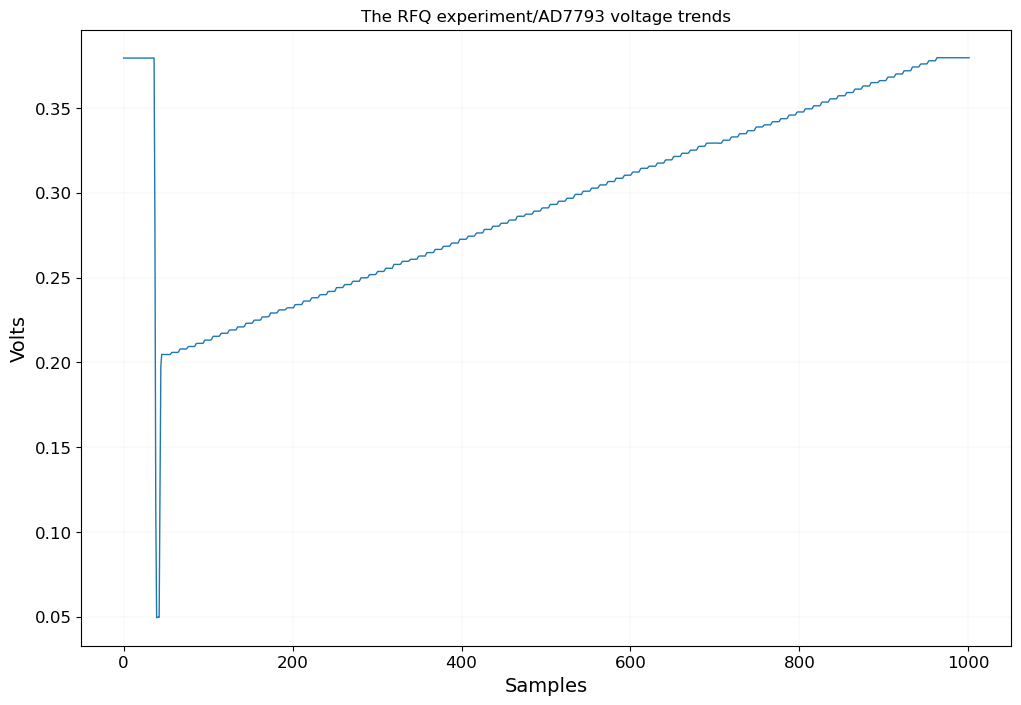

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from the Excel file
file_path = 'test_with_RFQ.xlsx'  
data = pd.read_excel(file_path)

# Plot samples vs volts with a refined line plot
plt.figure(figsize=(12, 8))  # Increased figure size for clarity
plt.plot(data['Samples'], data['Volts'], linestyle='-', linewidth=1)  

# Set plot title and labels
plt.title('The RFQ experiment/AD7793 voltage trends')
plt.xlabel('Samples', fontsize=14)  # Add x-axis label
plt.ylabel('Volts(V)', fontsize=14)

plt.grid(True, which='both', linestyle='--', linewidth=0.1)

# Increase font size for ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()


In [10]:
import pandas as pd

# Load data from the Excel file
file_path = 'test_with_RFQ.xlsx'
data = pd.read_excel(file_path)

# Filter data starting from sample 47
filtered_data = data[data['Samples'] >= 47].reset_index(drop=True)

# Define segment size and initiate variables
stabilization_size = 8
rising_size = 2
segment_means = []

# Process data in chunks, first 8 values for stabilization
for i in range(0, len(filtered_data), stabilization_size + rising_size):
    stabilization_segment = filtered_data['Volts'][i:i + stabilization_size]
    
    if len(stabilization_segment) == stabilization_size:
        stabilization_mean = stabilization_segment.mean()
        segment_means.append({'Segment': i // (stabilization_size + rising_size) + 1, 
                              'Type': 'Stabilization', 
                              'Mean': stabilization_mean})

# Convert the results to a DataFrame
segment_means_df = pd.DataFrame(segment_means)

# Calculate the differences (Delta V_step) between consecutive segment means
segment_means_df['Delta V_step'] = segment_means_df['Mean'].diff().dropna()

# Drop the NaN value from the first difference calculation
segment_means_df = segment_means_df.dropna()

# Print the updated DataFrame with Delta V_step
print(segment_means_df)


    Segment           Type      Mean  Delta V_step
1         2  Stabilization  0.205891      0.001246
2         3  Stabilization  0.207913      0.002022
3         4  Stabilization  0.209394      0.001481
4         5  Stabilization  0.211229      0.001835
5         6  Stabilization  0.213185      0.001956
..      ...            ...       ...           ...
90       91  Stabilization  0.376593      0.001891
91       92  Stabilization  0.378478      0.001885
92       93  Stabilization  0.379697      0.001218
93       94  Stabilization  0.379701      0.000005
94       95  Stabilization  0.379697     -0.000004

[94 rows x 4 columns]


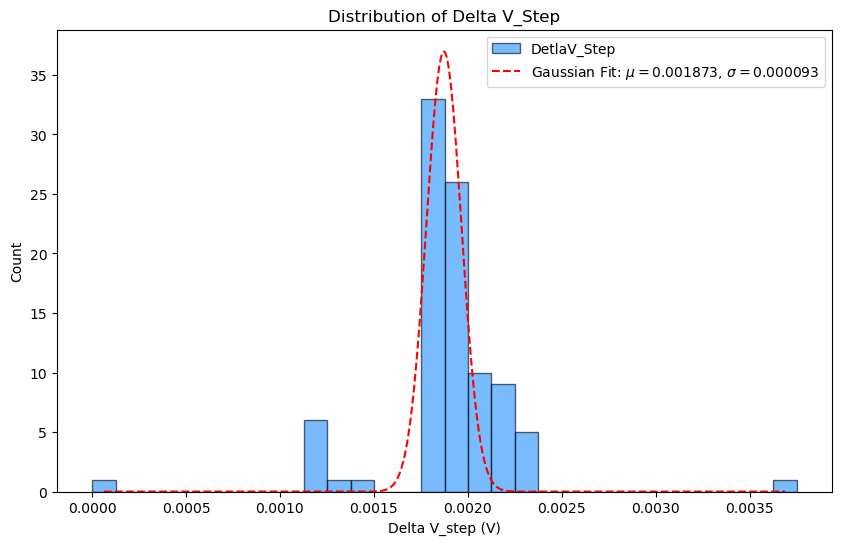

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 定义高斯函数进行拟合
def gaussian_corrected(x, mu, sigma, amplitude):
    return amplitude * np.exp(- (x - mu)**2 / (2 * sigma**2))

hist_data, bin_edges = np.histogram(delta_v_step, bins=30, density=False)

# 计算 bin 的中心
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# 拟合高斯函数到直方图数据
popt, pcov = curve_fit(gaussian_corrected, bin_centers, hist_data, p0=[np.mean(delta_v_step), np.std(delta_v_step), max(hist_data)])

# 提取拟合参数
mu_fit, sigma_fit, amplitude_fit = popt

# 绘制直方图和拟合曲线
plt.figure(figsize=(10, 6))

plt.hist(delta_v_step, bins=30, density=False, alpha=0.6, color='dodgerblue', edgecolor='black', label='DetlaV_Step')

x_fit = np.linspace(bin_centers.min(), bin_centers.max(), 1000)
y_fit = gaussian_corrected(x_fit, mu_fit, sigma_fit, amplitude_fit)
plt.plot(x_fit, y_fit, 'r--', label=f'Gaussian Fit: $\mu={mu_fit:.6f}$, $\sigma={sigma_fit:.6f}$')

# 添加标签、标题和图例
plt.xlabel('Delta V_step (V)')
plt.ylabel('Count')
plt.title('Distribution of Delta V_Step')
plt.legend()

# 显示图表
plt.show()
